In [1]:
from data_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *
import seaborn as sns
import scipy.stats as stats
from ggan import normalize, restore_scale

Using TensorFlow backend.


In [2]:
root_gene = None
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)

#GANs synthetic
nb_genes = len(gene_symbols)
synthetic_name = 'EColi_n{}_r{}_e{}_d{}'.format(len(gene_symbols), root_gene, minimum_evidence, max_depth)
s_expr, s_gs = load_synthetic(synthetic_name)

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

# Clip outliers
r_min = np.min(expr_train)
r_max = np.max(expr_train)
s_expr[s_expr < r_min] = r_min
s_expr[s_expr > r_max] = r_max




Found 4297 genes in datafile


In [23]:
#synthetic VAE
GE_s = np.loadtxt('./data/VAE/E_coli_data_decoded_dis_n.csv', delimiter = ',', dtype=np.float32)
GE_s = GE_s[1:,:]
genes_names_s = gene_symbols

nb_genes = len(gene_symbols)
s_expr = GE_s
s_gs = gene_symbols

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

mean = np.mean(r_expr, axis=0)
std = np.std(r_expr, axis=0)
r_min = r_expr.min()
r_max = r_expr.max()


s_expr_restored = restore_scale(s_expr, mean, std)

# Clip outliers
r_min = np.min(expr_train)
r_max = np.max(expr_train)
s_expr_restored[s_expr_restored < r_min] = r_min
s_expr_restored[s_expr_restored > r_max] = r_max

In [24]:
print(np.max(s_expr_restored))

14.7879726895


# Intensity histograms

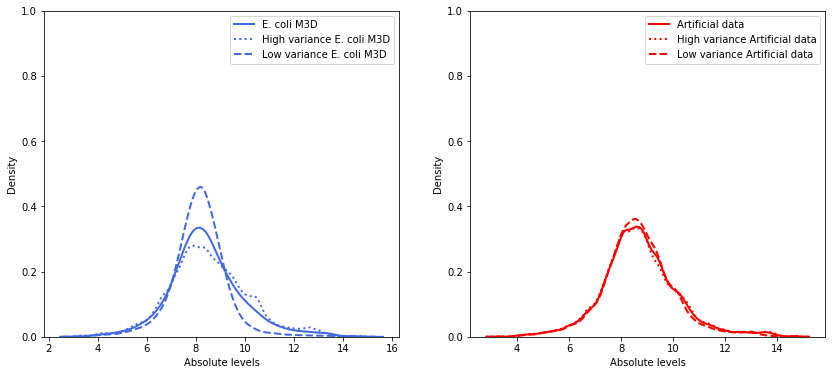

In [28]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(r_expr)
plt.ylim(0,1.)
plt.subplot(122)
plot_intensities(s_expr_restored, dataset_name='Artificial data', color='red')
plt.ylim(0,1.)
plt.show()

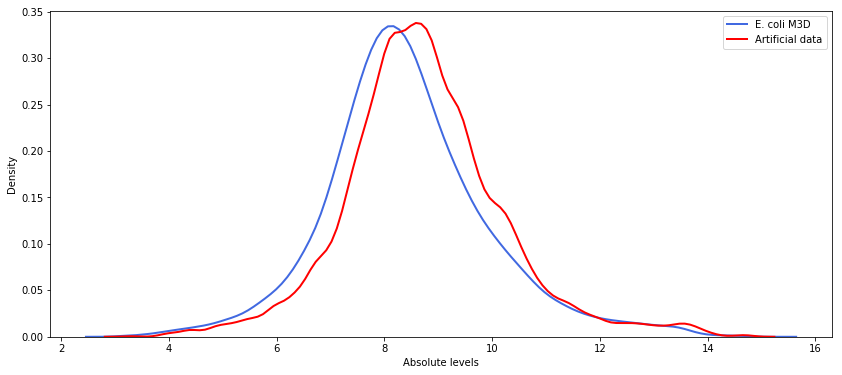

In [29]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(r_expr, plot_quantiles=False)
plot_intensities(s_expr_restored, dataset_name='Artificial data', color='red', plot_quantiles=False, ax=ax)
plt.show()

# Gene ranges histograms

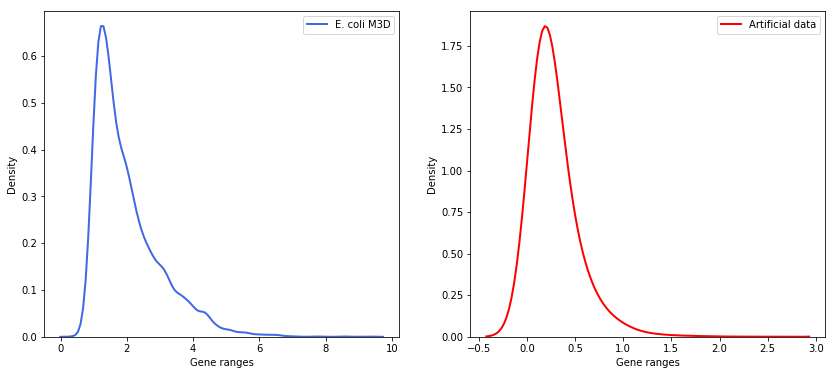

In [30]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_gene_ranges(r_expr)
plt.subplot(122)
plot_gene_ranges(s_expr_restored, dataset_name='Artificial data', color='red')
plt.show()

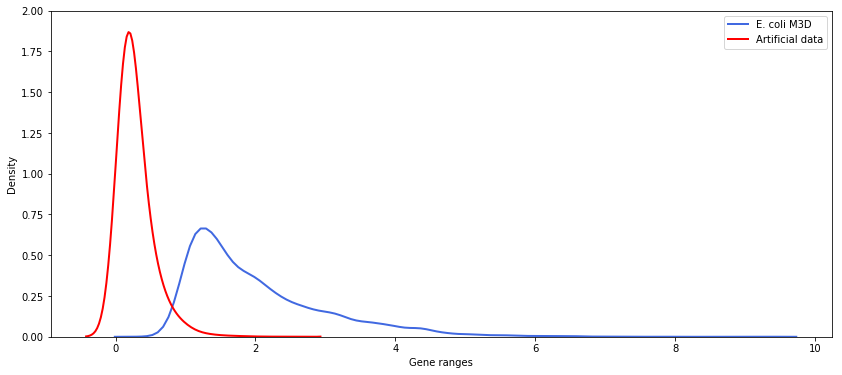

In [35]:
plt.figure(figsize=(14, 6))
ax = plot_gene_ranges(r_expr)
plot_gene_ranges(s_expr_restored, dataset_name='Artificial data', color='red', ax=ax)
plt.ylim(0,2.)
plt.show()

# TF-TG histogram (using synthetic background distribution)

In [37]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(r_expr, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr_restored, gene_symbols)
r_back_corr = correlations_list(r_expr, r_expr)
s_back_corr = correlations_list(s_expr_restored, s_expr_restored)

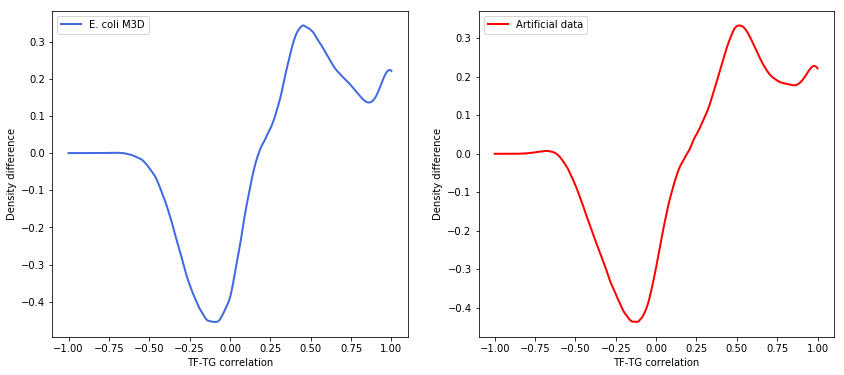

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red')
plt.show()

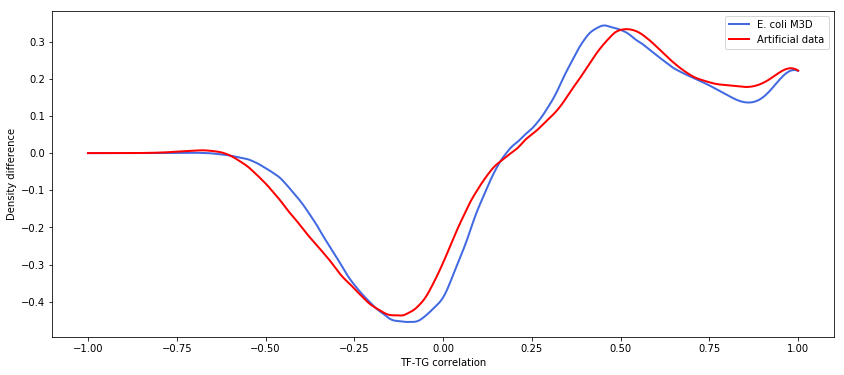

In [39]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax)
plt.show()

# TF-TG histogram (using real background distribution)

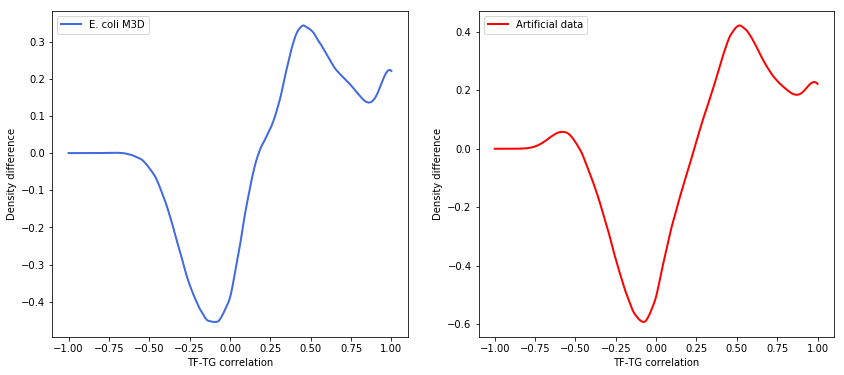

In [40]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red')
plt.show()

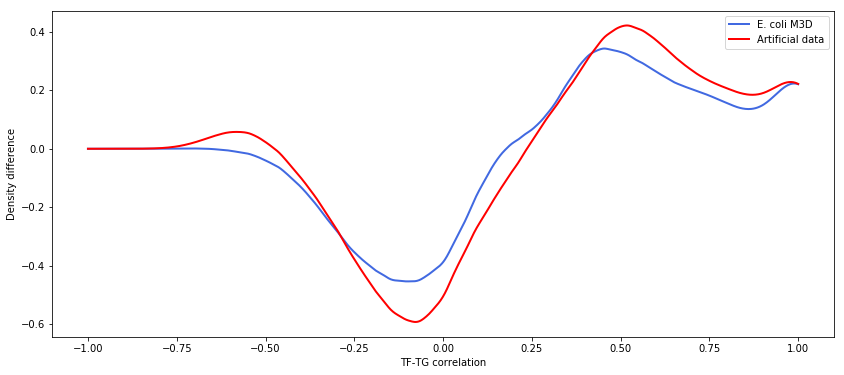

In [41]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax)  # Try s_back_corr
plt.show()

# TG-TG histogram (using synthetic background distribution)

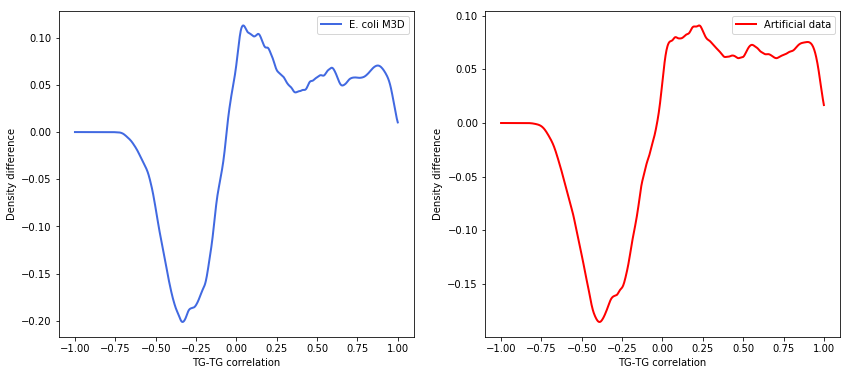

In [42]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red')
plt.show()

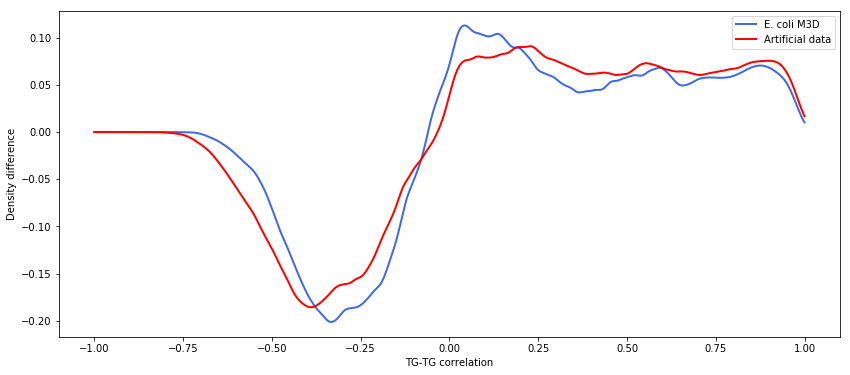

In [43]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax)
plt.show()

# TG-TG histogram (using real background distribution)

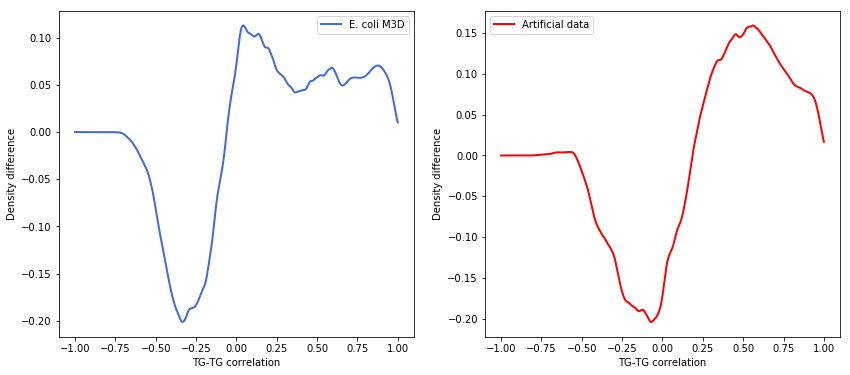

In [44]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red')
plt.show()

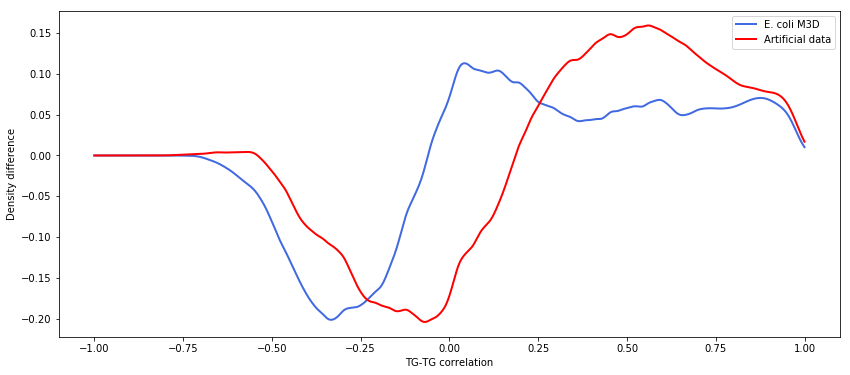

In [45]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax)
plt.show()

# Compare background distributions

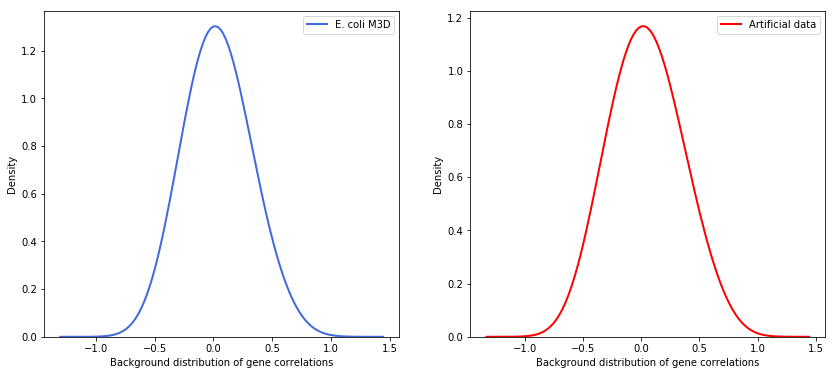

In [46]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density',)
plt.subplot(122)
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density', label='Artificial data', color='red')
plt.show()

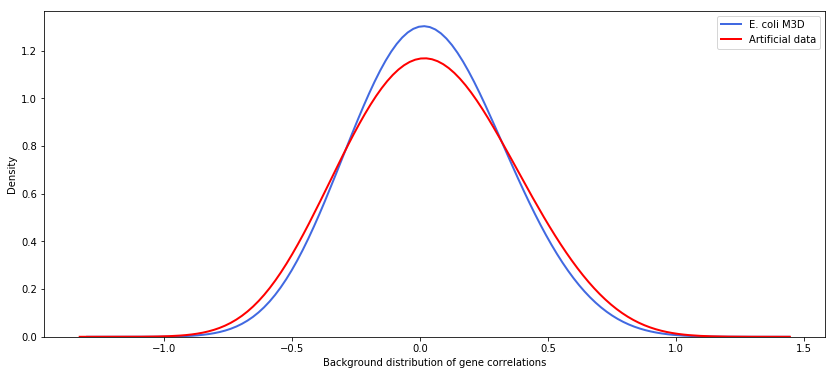

In [47]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', ylabel='Density', label='Artificial data', color='red')
plt.show()

# TF activity histogram

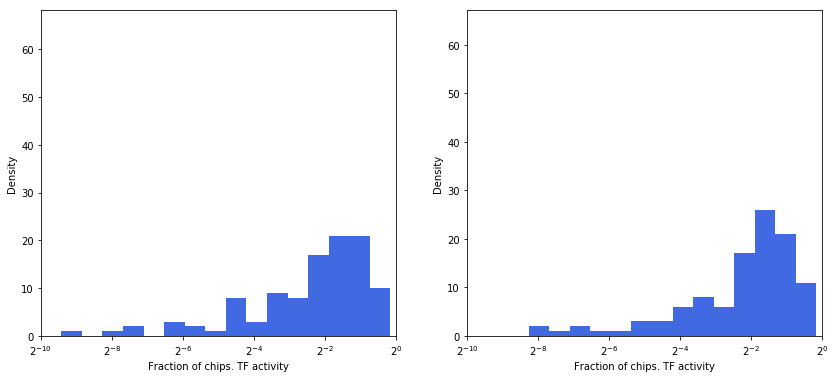

In [48]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(expr_train, gene_symbols)
plt.subplot(122)
plot_tf_activity_histogram(s_expr_restored, gene_symbols)
plt.show()

# Quantitative analysis

In [49]:
scores = compute_scores(expr_train, s_expr_restored, gene_symbols)
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
print('gGAN')
for name, score in zip(score_names, scores):
    print('{}: {}'.format(name, score))

gGAN
S_dist: 0.9890394395448641
S_dend: 0.45006188242326167
S_sdcc: 0.0004143085246504968
S_tftg: 0.9904427249585284
S_tgtg: 0.9927290757098968
S_tfac: 0.9898633319895526


# Analyze gene histograms

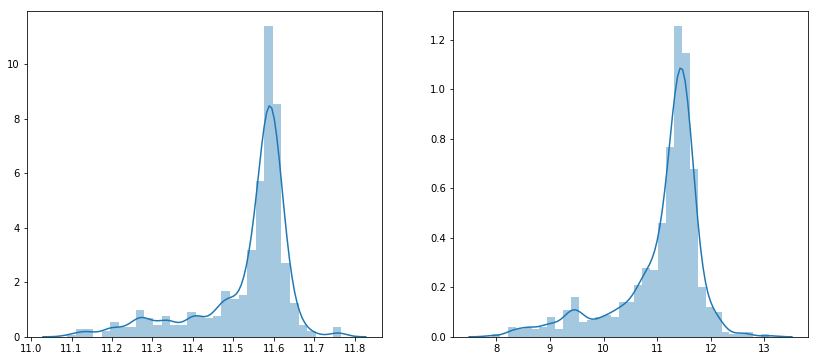

In [50]:
crp_idx = np.argwhere(np.array(gene_symbols) == 'crp')
idx = crp_idx
plt.figure(figsize=(14, 6))
plt.title('Expression levels of CRP');
plt.subplot(121)
ax = sns.distplot(s_expr_restored[:, idx])
plt.subplot(122)
ax = sns.distplot(expr_train[:, idx])
plt.show()

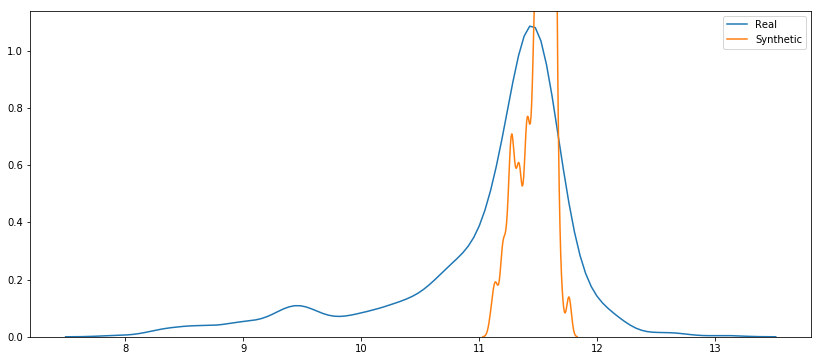

In [51]:
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, crp_idx]
s_expr_gene = s_expr_restored[:, crp_idx]
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

In [52]:
diag = np.diag(np.ones(nb_genes))
r_corr = pearson_correlation(expr_train, expr_train) - diag
s_corr = pearson_correlation(s_expr_restored, s_expr_restored) - diag
crp_idx = np.argwhere(np.array(gene_symbols) == 'crp').ravel()

In [53]:
r_corr_crp = r_corr[crp_idx, :].ravel()
s_corr_crp = s_corr[crp_idx, :].ravel()
r_max_corr_crp = np.max(r_corr_crp)
s_max_corr_crp = np.max(s_corr_crp)
sorted_idxs = np.argsort(r_corr_crp)[::-1]
print('CRP max correlated ({:.4f}) gene: {}'.format(r_max_corr_crp, gene_symbols[sorted_idxs[0]]))
print('CRP correlation with {} in synthetic: {}'.format(gene_symbols[sorted_idxs[0]], s_corr_crp[sorted_idxs[0]]))

CRP max correlated (0.7820) gene: yjgf
CRP correlation with yjgf in synthetic: 0.8355882602408915


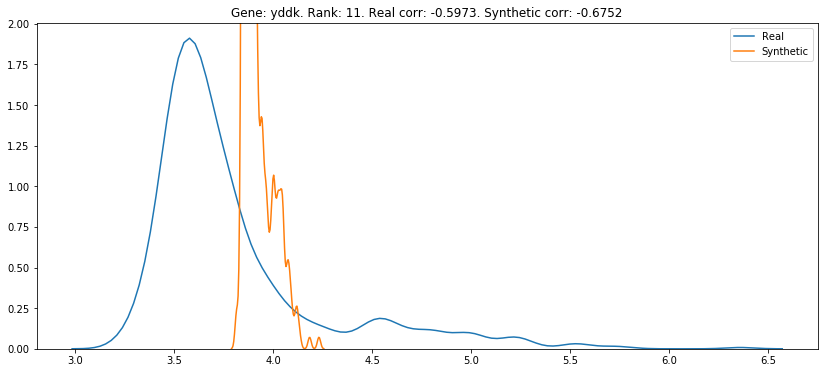

In [54]:
idx = -11
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, sorted_idxs[idx]]
s_expr_gene = s_expr_restored[:, sorted_idxs[idx]]
plt.title('Gene: {}. Rank: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[sorted_idxs[idx]],
                                                                          max(idx+1, abs(idx)),
                                                                          r_corr_crp[sorted_idxs[idx]],
                                                                          s_corr_crp[sorted_idxs[idx]]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

# Master regulators' histograms

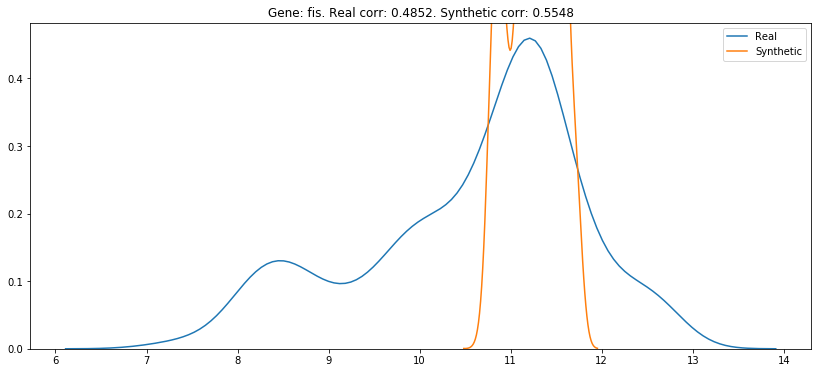

In [55]:
master_regulators = ['fis', 'hns', 'lrp', 'fnr', 'arca']
idx = 0
idx = np.argwhere(np.array(gene_symbols) == master_regulators[idx]).ravel()[0]
plt.figure(figsize=(14, 6))
r_expr_gene = expr_train[:, idx]
s_expr_gene = s_expr_restored[:, idx]
plt.title('Gene: {}. Real corr: {:.4f}. Synthetic corr: {:.4f}'.format(gene_symbols[idx],
                                                                          r_corr_crp[idx],
                                                                          s_corr_crp[idx]))
ax = sns.distplot(r_expr_gene, hist=False, label='Real')
ax = sns.distplot(s_expr_gene, hist=False, label='Synthetic')
plt.show()

# Save CSV

In [56]:
write_csv('real.csv', expr_train, gene_symbols)
write_csv('synthetic.csv', s_expr_restored, gene_symbols)